Project 3: Unsupervised Learning

tpham328

Diabetes Dataset

In [93]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import homogeneity_score, completeness_score
import time
import seaborn as sns
import matplotlib.pyplot as plt 

from warnings import filterwarnings
filterwarnings(action='ignore')

In [94]:
data = pd.read_csv("diabetes.csv")
print("Successfully Imported Data!")

data.head()
print(data.shape)

Successfully Imported Data!
(768, 9)


In [95]:
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

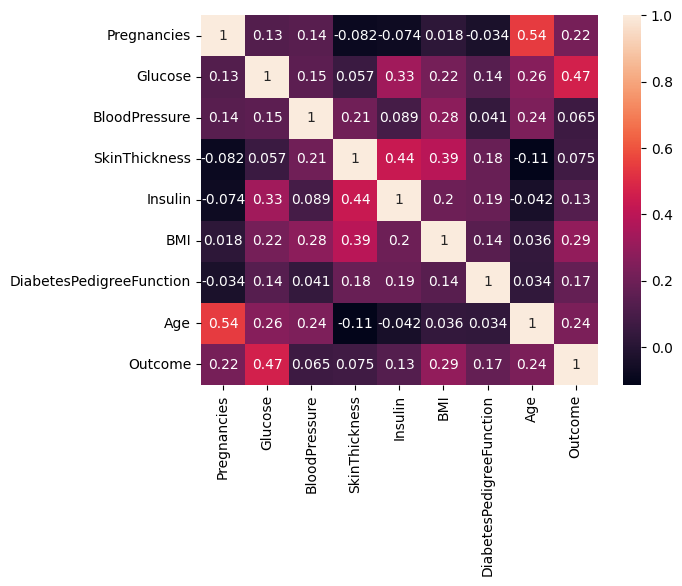

In [96]:
corr = data.corr()
sns.heatmap(corr,annot=True)

In [97]:


# Assuming 'data' is your dataframe and 'quality' is the label column
X = data.drop(columns='Outcome')
original_Y = data['Outcome']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


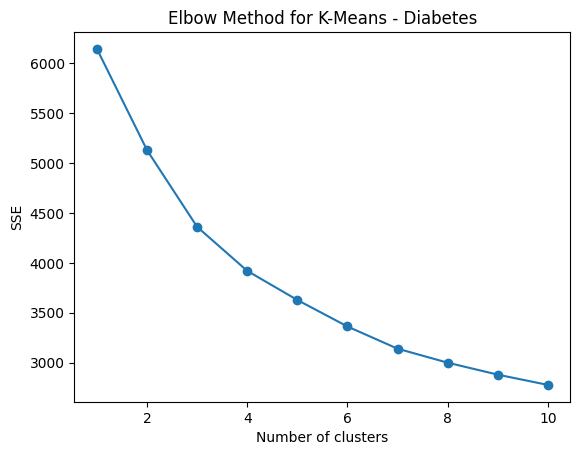

In [98]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=328)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for K-Means - Diabetes')
plt.show()


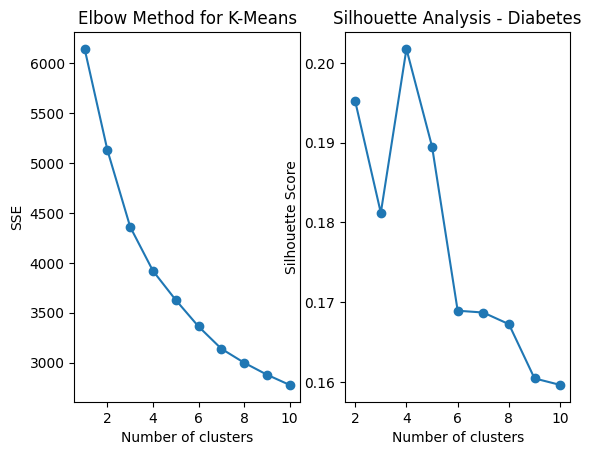

In [99]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=328)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans_labels))

# plt.figure(figsize=(10, 6))
# plt.plot(range(2, 11), silhouette_scores, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Analysis for K-Means - Diabetes')
# plt.show()

plt.subplot(1,2,1)
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for K-Means')

plt.subplot(1,2,2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis - Diabetes')
plt.show()

In [100]:
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


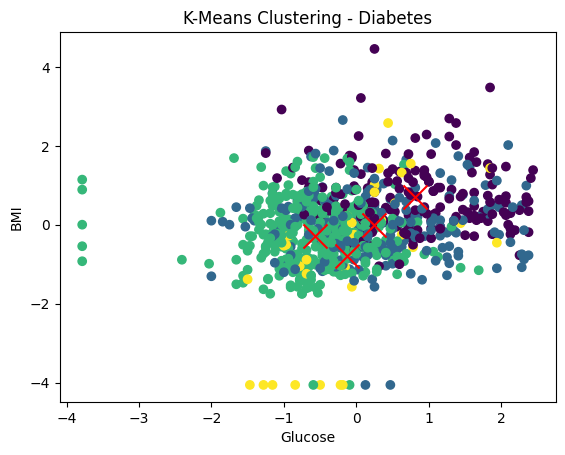

KMeans Homogeneity: 0.152
KMeans Completeness: 0.082


In [101]:
# Optimal number of clusters from the Elbow or Silhouette method
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=328)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Calculate homogeneity and completeness for KMeans
kmeans_homogeneity = homogeneity_score(original_Y, kmeans_labels)
kmeans_completeness = completeness_score(original_Y, kmeans_labels)
# Scatter plot with cluster centers
# plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 1], X_scaled[:,5], c=kmeans_labels, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 5], s=300, c='red', marker='x')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('K-Means Clustering - Diabetes')
plt.show()

print(f"KMeans Homogeneity: {kmeans_homogeneity:.3f}")
print(f"KMeans Completeness: {kmeans_completeness:.3f}")


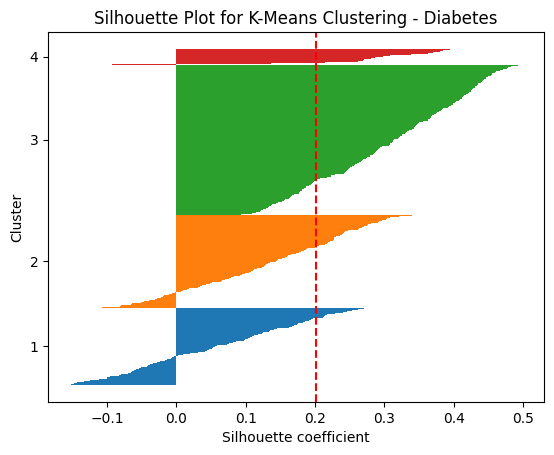

In [102]:
import numpy as np
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

# Silhouette plot
silhouette_vals = silhouette_samples(X_scaled, kmeans_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(kmeans_labels)):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(kmeans_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot for K-Means Clustering - Diabetes')
plt.show()


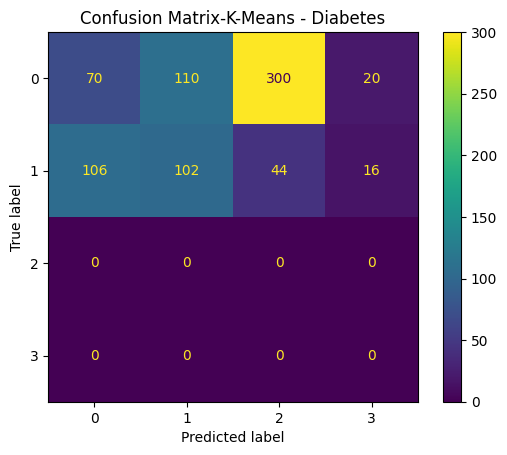

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_kmeans = confusion_matrix(original_Y, kmeans_labels)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans)
disp_kmeans.plot()
plt.title('Confusion Matrix-K-Means - Diabetes')
plt.show()

# EM Clustering

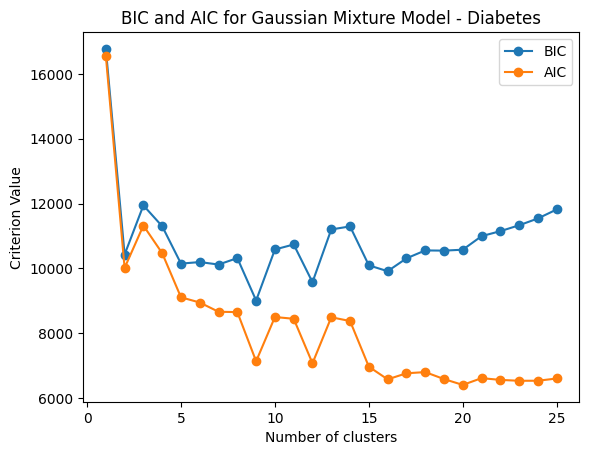

In [104]:

n_components_range = range(1, 26)
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=328)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))
    aics.append(gmm.aic(X_scaled))

# Plot BIC and AIC

plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.plot(n_components_range, aics, label='AIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Criterion Value')
plt.title('BIC and AIC for Gaussian Mixture Model - Diabetes')
plt.legend()
plt.show()


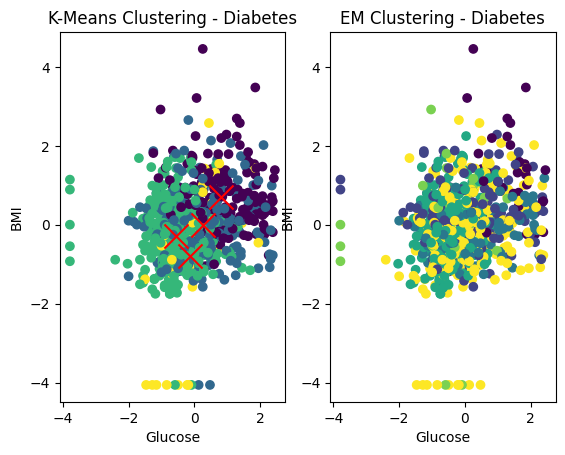

Gaussian Mixture Homogeneity: 0.104
Gaussian Mixture Completeness: 0.043


In [105]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components = 6, random_state=328)
gmm_labels = gmm.fit_predict(X_scaled)

# Calculate homogeneity and completeness for Gaussian Mixture
gmm_homogeneity = homogeneity_score(original_Y, gmm_labels)
gmm_completeness = completeness_score(original_Y, gmm_labels)

# Scatter plot
# plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.scatter(X_scaled[:, 1], X_scaled[:,5], c=kmeans_labels, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 5], s=300, c='red', marker='x')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('K-Means Clustering - Diabetes')

plt.subplot(1,2,2)
plt.scatter(X_scaled[:, 1], X_scaled[:, 5], c=gmm_labels, marker='o')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('EM Clustering - Diabetes')
plt.show()

print(f"Gaussian Mixture Homogeneity: {gmm_homogeneity:.3f}")
print(f"Gaussian Mixture Completeness: {gmm_completeness:.3f}")


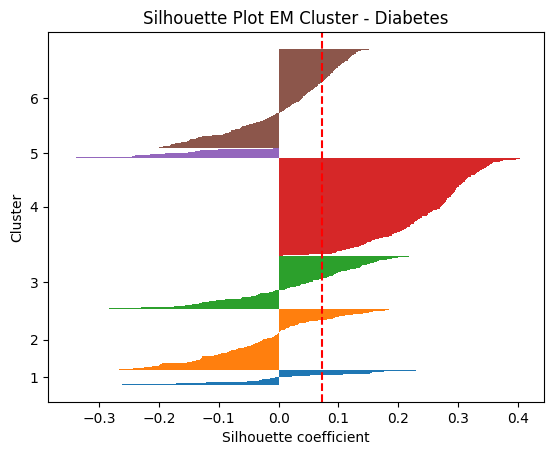

In [106]:
# Silhouette plot for GMM
silhouette_vals_gmm = silhouette_samples(X_scaled, gmm_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(gmm_labels)):
    cluster_silhouette_vals = silhouette_vals_gmm[gmm_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals_gmm), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(gmm_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot EM Cluster - Diabetes')
plt.show()


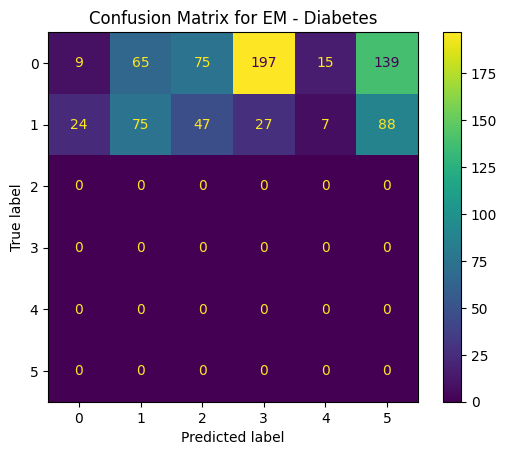

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_gmm = confusion_matrix(original_Y, gmm_labels)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_gmm)
disp_kmeans.plot()
plt.title('Confusion Matrix for EM - Diabetes')
plt.show()

# Measure training time

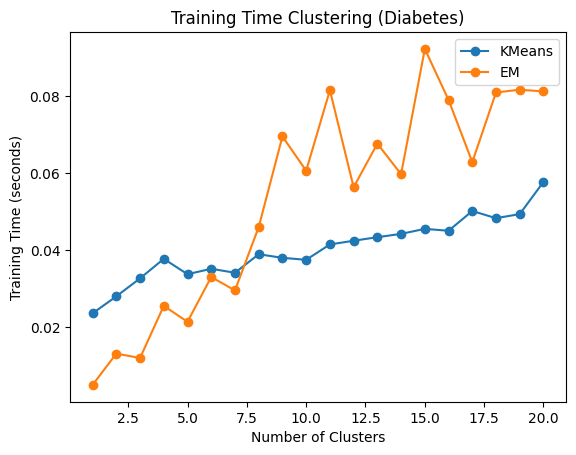

In [108]:

kmeans_times = []
em_times = []

# Iterate over the number of clusters from 1 to 10
for n_clusters in range(1, 21):
    # Measure the time for KMeans
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=328)
    kmeans.fit(X_scaled)
    kmeans_times.append(time.time() - start_time)
    
    # Measure the time for EM (Gaussian Mixture)
    start_time = time.time()
    gmm = GaussianMixture(n_components=n_clusters, random_state=328)
    gmm.fit(X_scaled)
    em_times.append(time.time() - start_time)

# Plot the training times for both KMeans and EM clustering

plt.plot(range(1, 21), kmeans_times, marker='o', label='KMeans')
plt.plot(range(1, 21), em_times, marker='o', label='EM')
plt.xlabel('Number of Clusters')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Clustering (Diabetes)')
plt.legend()
plt.show()